### EDA explained using sample Data set:
To share my understanding of the concept and techniques I know,I’ll take an example of white variant of Wine Quality data set which is available on UCI Machine Learning Repository and try to catch hold of as many insights from the data set using EDA.

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("winequality-white.csv",delimiter=';')
# To display the top 5 rows
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Checking the data type
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.shape

(4898, 12)

Dataset comprises of 4898 observations and 12 characteristics.

Out of which one is dependent variable and rest 11 are independent variables — physico-chemical characteristics. 

It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Data has only float and integer values.

No variable column has null/missing values.

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Here as you can notice mean value is less than median value of each column which is represented by 50%(50th percentile) in index column. 

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”,”free sulfur dioxide”,”total sulfur dioxide”.

Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.

In [10]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

Target variable/Dependent variable is discrete and categorical in nature.\
“quality” score scale ranges from 1 to 10;where 1 being poor and 10 being the best.\
1,2 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 9.


In [11]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

This tells us vote count of each quality score in descending order.\
“quality” has most values concentrated in the categories 5, 6 and 7.\
Only a few observations made for the categories 3 & 9.


In [15]:
# Total number of rows and columns
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

(4898, 12)
number of duplicate rows:  (937, 12)


In [16]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [17]:
# Counting the number of rows after removing duplicates.
df.count()

fixed acidity           3961
volatile acidity        3961
citric acid             3961
residual sugar          3961
chlorides               3961
free sulfur dioxide     3961
total sulfur dioxide    3961
density                 3961
pH                      3961
sulphates               3961
alcohol                 3961
quality                 3961
dtype: int64

In [18]:
# Finding the null values.
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:xlabel='quality'>

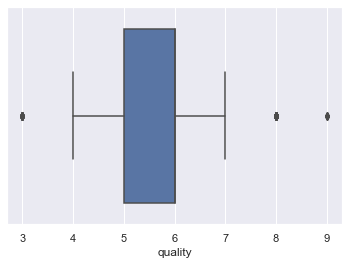

In [22]:
sns.boxplot(x=df['quality'])

<AxesSubplot:xlabel='total sulfur dioxide'>

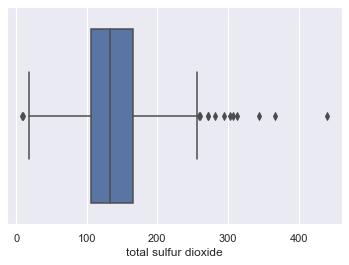

In [23]:
sns.boxplot(x=df['total sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide'>

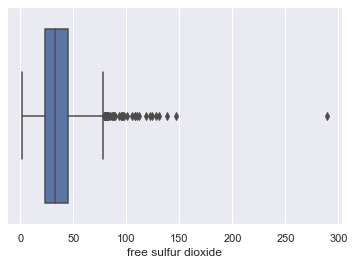

In [24]:
sns.boxplot(x=df['free sulfur dioxide'])

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.00000
volatile acidity         0.12000
citric acid              0.12000
residual sugar           7.30000
chlorides                0.01500
free sulfur dioxide     22.00000
total sulfur dioxide    60.00000
density                  0.00409
pH                       0.20000
sulphates                0.14000
alcohol                  1.90000
quality                  1.00000
dtype: float64


In [25]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(3131, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.026401,0.255031,0.063909,0.091481,-0.038282,0.065303,0.230213,-0.382801,-0.006514,-0.074948,-0.075614
volatile acidity,-0.026401,1.000000,-0.126006,0.104010,0.007232,-0.067411,0.144109,0.026430,-0.055484,-0.003341,0.082157,-0.127368
citric acid,0.255031,-0.126006,1.000000,0.039439,0.042329,0.087604,0.096777,0.090842,-0.120862,0.062117,-0.028781,0.019924
residual sugar,0.063909,0.104010,0.039439,1.000000,0.253685,0.365168,0.428649,0.825834,-0.157274,-0.028993,-0.446251,-0.143023
chlorides,0.091481,0.007232,0.042329,0.253685,1.000000,0.178264,0.376250,0.492209,0.012428,0.081094,-0.535046,-0.297655
free sulfur dioxide,-0.038282,-0.067411,0.087604,0.365168,0.178264,1.000000,0.625993,0.350087,-0.031272,0.035464,-0.273743,0.015161
total sulfur dioxide,0.065303,0.144109,0.096777,0.428649,0.376250,0.625993,1.000000,0.566696,0.018733,0.145623,-0.475404,-0.182821
density,0.230213,0.026430,0.090842,0.825834,0.492209,0.350087,0.566696,1.000000,-0.024366,0.098764,-0.804195,-0.335219
pH,-0.382801,-0.055484,-0.120862,-0.157274,0.012428,-0.031272,0.018733,-0.024366,1.000000,0.112826,0.041385,0.107804
sulphates,-0.006514,-0.003341,0.062117,-0.028993,0.081094,0.035464,0.145623,0.098764,0.112826,1.000000,-0.084814,0.037947


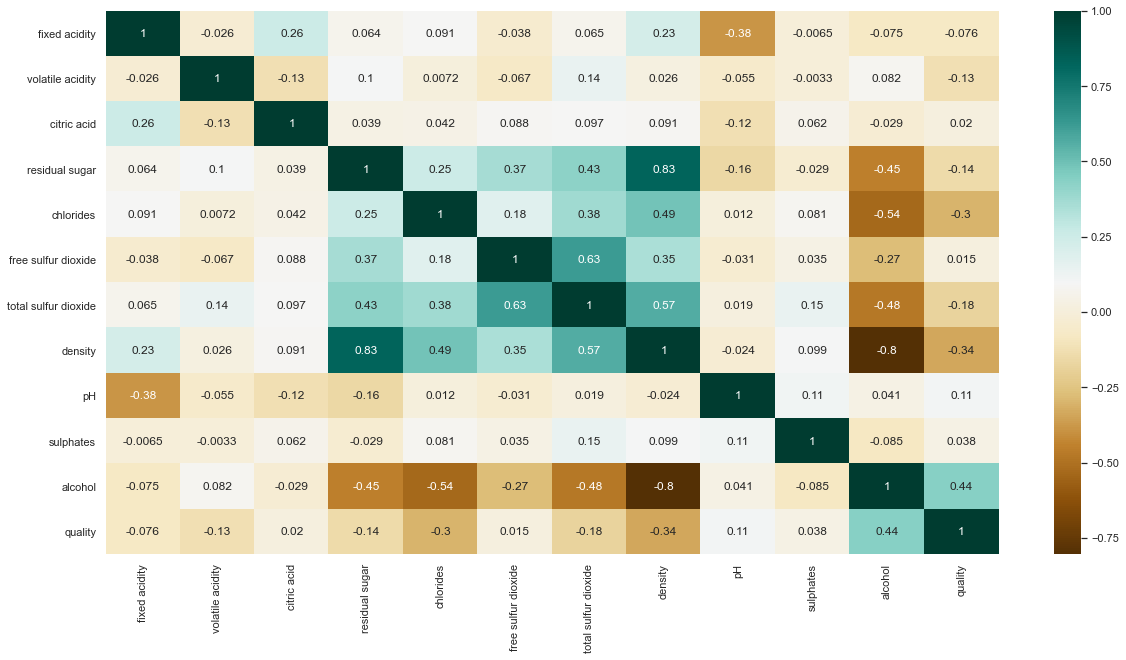

In [26]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### To check distribution-Skewness

<ipython-input-29-503dca8aa8d7>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
/home/rjn/miniconda3/envs/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-29-503dca8aa8d7>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
/home/rjn/miniconda3/envs/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprec

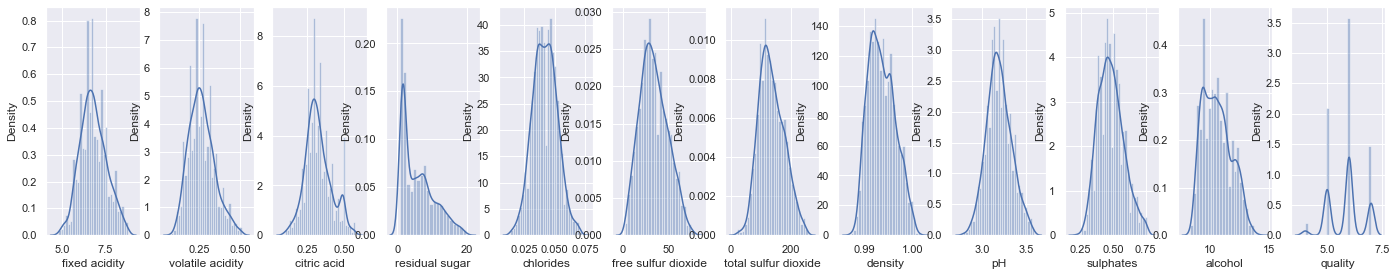

In [29]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 